In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [ ]:
airlineDf = pd.read_csv('SKYWARDS_DATA_CW2.csv', encoding='ISO-8859-1')

### Data preprocessing

##### Check for Null values

In [ ]:
null_counts = airlineDf.isnull().sum()
print(null_counts)

Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Flight Distance Rounded                0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service

##### Removing Null values

In [ ]:
airlineDf = airlineDf.drop(['Ref','id','Age Band','Destination','Continent'],axis=1)

In [ ]:
rows_with_nulls = airlineDf[airlineDf.isnull().any(axis=1)]
rows_with_nulls

,Gender,Satisfied,Age,Type of Travel,Class,Flight Distance,Flight Distance Rounded,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
213,Female,Y,38,Business travel,Eco,109,4565,5,3,3,...,5,5,5,2,4,1,1,5,31,NaN
1124,Male,N,53,Personal Travel,Eco,1012,4760,3,2,3,...,4,4,4,4,4,3,3,4,38,NaN
1529,Male,Y,39,Business travel,Business,733,4760,2,5,5,...,3,2,2,2,2,2,2,3,11,NaN
2004,Female,N,26,Business travel,Business,1035,1035,0,3,3,...,2,2,3,3,4,5,5,2,41,NaN
2108,Female,Y,24,Personal Travel,Eco,417,4760,2,1,2,...,5,5,1,4,2,1,2,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,N,49,Personal Travel,Eco Plus,1249,4760,2,5,2,...,3,3,4,5,4,3,4,3,230,NaN
102384,Male,N,58,Business travel,Eco,733,4760,3,3,3,...,3,3,3,1,2,4,2,3,55,NaN
102552,Female,N,29,Business travel,Eco,1107,4760,2,1,1,...,3,5,4,1,5,5,3,5,0,NaN
102960,Male,N,58,Business travel,Eco,1088,4760,4,4,1,...,5,5,1,5,5,5,3,5,0,NaN


#### Check for duplication of data

In [ ]:
duplicates = airlineDf.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


#### Check datatypes

In [ ]:
print(airlineDf.dtypes)

Gender                                object
Satisfied                             object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Flight Distance Rounded                int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

## EDA

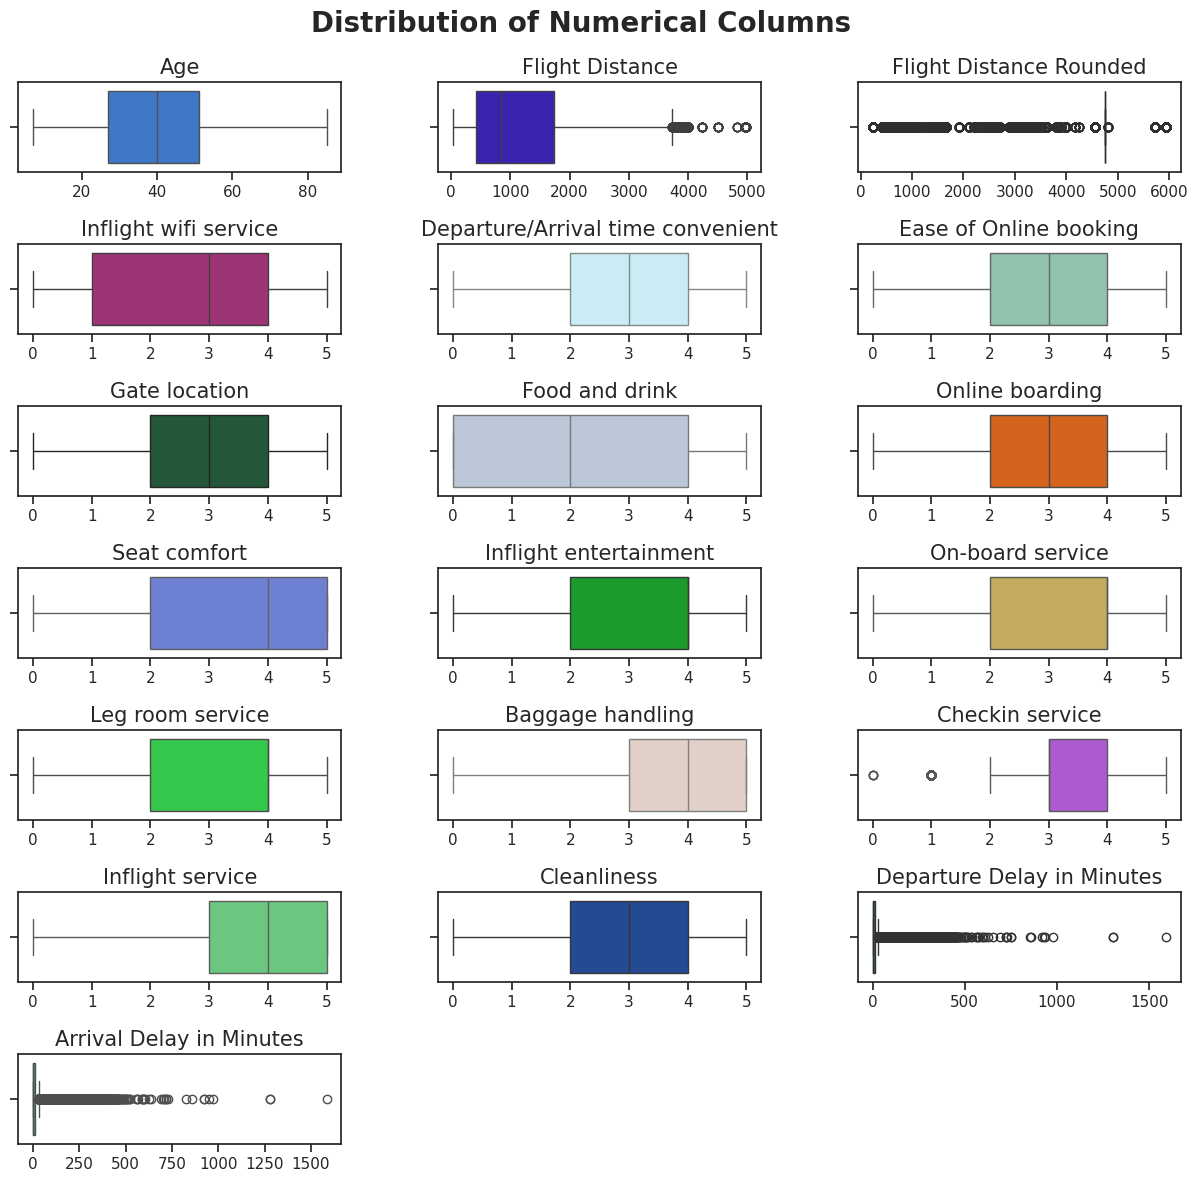

In [ ]:
def generate_colors(num):
    if num==1:
        colors=''
        lst = list('ABCDEF0123456789')
        for i in range(num):
            colors='#'+''.join(np.random.choice(lst, 6))
    else:
        colors = []
        lst = list('ABCDEF0123456789')

        for i in range(num):
            colors.append('#'+''.join(np.random.choice(lst, 6)))

    return colors
numeric_df=airlineDf._get_numeric_data()
sns.set_style('ticks')
fig = plt.figure(figsize=(15,18))

for i,column_name in enumerate(numeric_df):
    plt.subplot(9,3,i+1)
    ax=sns.boxplot(x=column_name,data=airlineDf,color=generate_colors(1))
    ax.set_title(column_name,size=15)
    plt.xlabel('')

plt.subplots_adjust(hspace = 0.8, wspace=0.3)
fig.suptitle("Distribution of Numerical Columns",size=20,fontweight='bold',y=0.92)
plt.show()

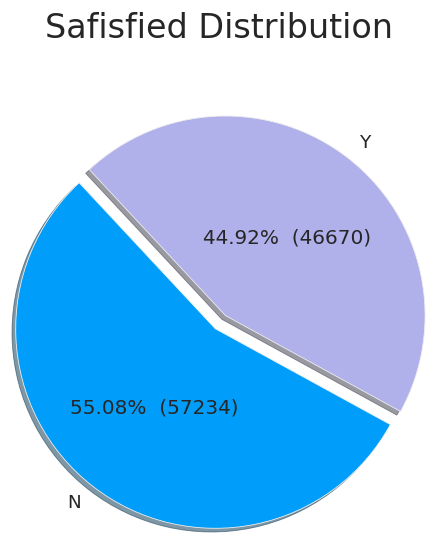

,count
Satisfied,
N,57234
Y,46670


In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.figure(figsize=(4,3),dpi=120)

plt.style.use('bmh')

plt.title('Safisfied Distribution',size=20,y=1.5,x=0.5)

explode=(.05,.1)

plt.pie(airlineDf['Satisfied'].value_counts(),labels=['N','Y'],shadow=True,colors=['#009EFA','#B0B0EB'],
autopct=make_autopct(airlineDf['Gender'].value_counts()),pctdistance=0.5,radius=1.8,startangle=133,explode=explode)

plt.show()
airlineDf['Satisfied'].value_counts()

In [ ]:
airlineDf.fillna(0,inplace=True)
airlineDf

,Gender,Satisfied,Age,Type of Travel,Class,Flight Distance,Flight Distance Rounded,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Y,13,Personal Travel,Eco Plus,460,4760,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,N,25,Business travel,Business,235,235,0,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Y,26,Business travel,Business,1142,4760,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Y,25,Business travel,Business,562,560,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,N,61,Business travel,Business,214,4760,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,N,23,Business travel,Eco,192,4760,2,1,2,...,2,2,3,1,4,2,3,2,3,0.0
103900,Male,N,49,Business travel,Business,2347,4760,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0
103901,Male,N,30,Business travel,Business,1995,4760,0,1,1,...,5,4,3,2,4,5,5,4,7,14.0
103902,Female,N,22,Business travel,Eco,1000,4760,1,1,1,...,1,1,4,5,1,5,4,1,0,0.0


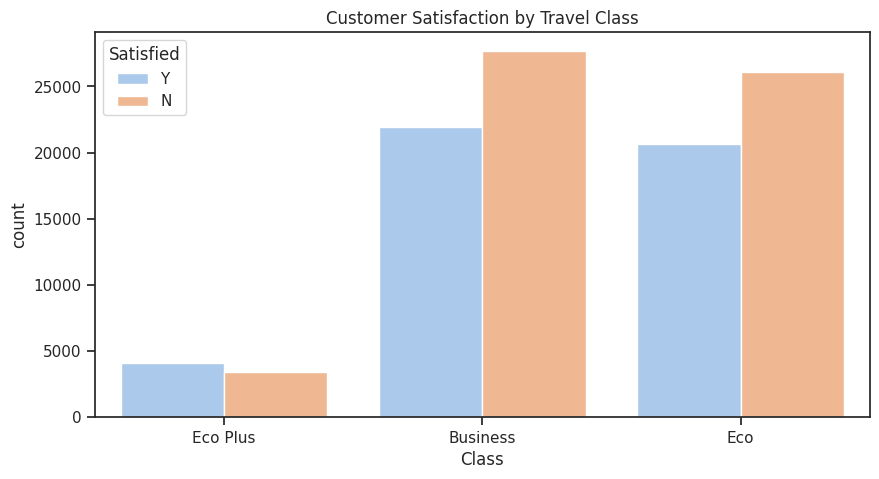

In [ ]:
sns.set(style="ticks")
plt.figure(figsize=(10, 5)) #Creating a bankground.
sns.countplot(x='Class', hue='Satisfied',
              data=airlineDf, palette = 'pastel') # Creating a plot based on travel class.
plt.title('Customer Satisfaction by Travel Class') #labeling the title.
plt.show()

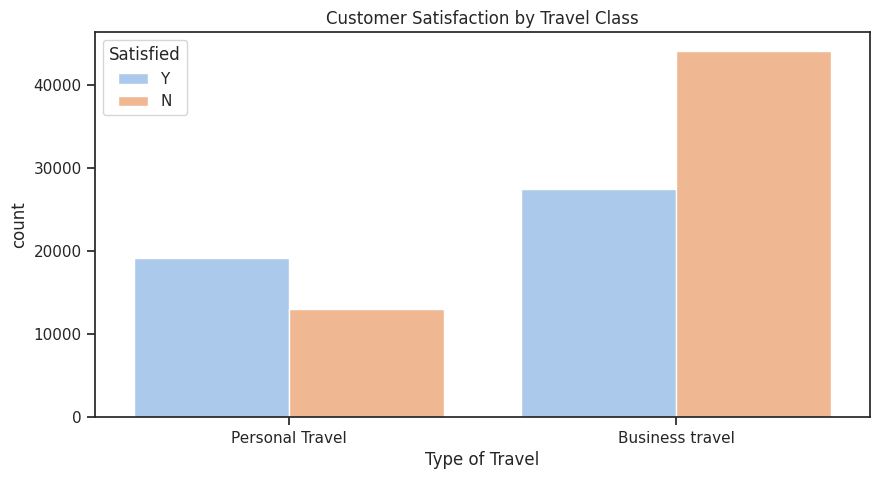

In [ ]:
sns.set(style="ticks")
plt.figure(figsize=(10, 5)) #Creating a bankground.
sns.countplot(x='Type of Travel', hue='Satisfied',
              data=airlineDf, palette = 'pastel') # Creating a plot based on travel class.
plt.title('Customer Satisfaction by Travel Class') #labeling the title.
plt.show()

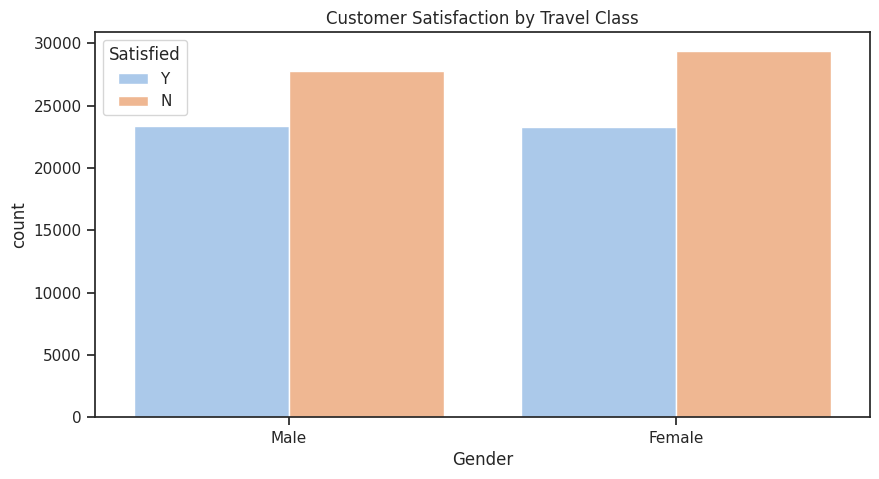

In [ ]:
sns.set(style="ticks")
plt.figure(figsize=(10, 5)) #Creating a bankground.
sns.countplot(x='Gender', hue='Satisfied',
              data=airlineDf, palette = 'pastel') # Creating a plot based on travel class.
plt.title('Customer Satisfaction by Travel Class') #labeling the title.
plt.show()

In [ ]:
airlineDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Satisfied                          103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Flight Distance Rounded            103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

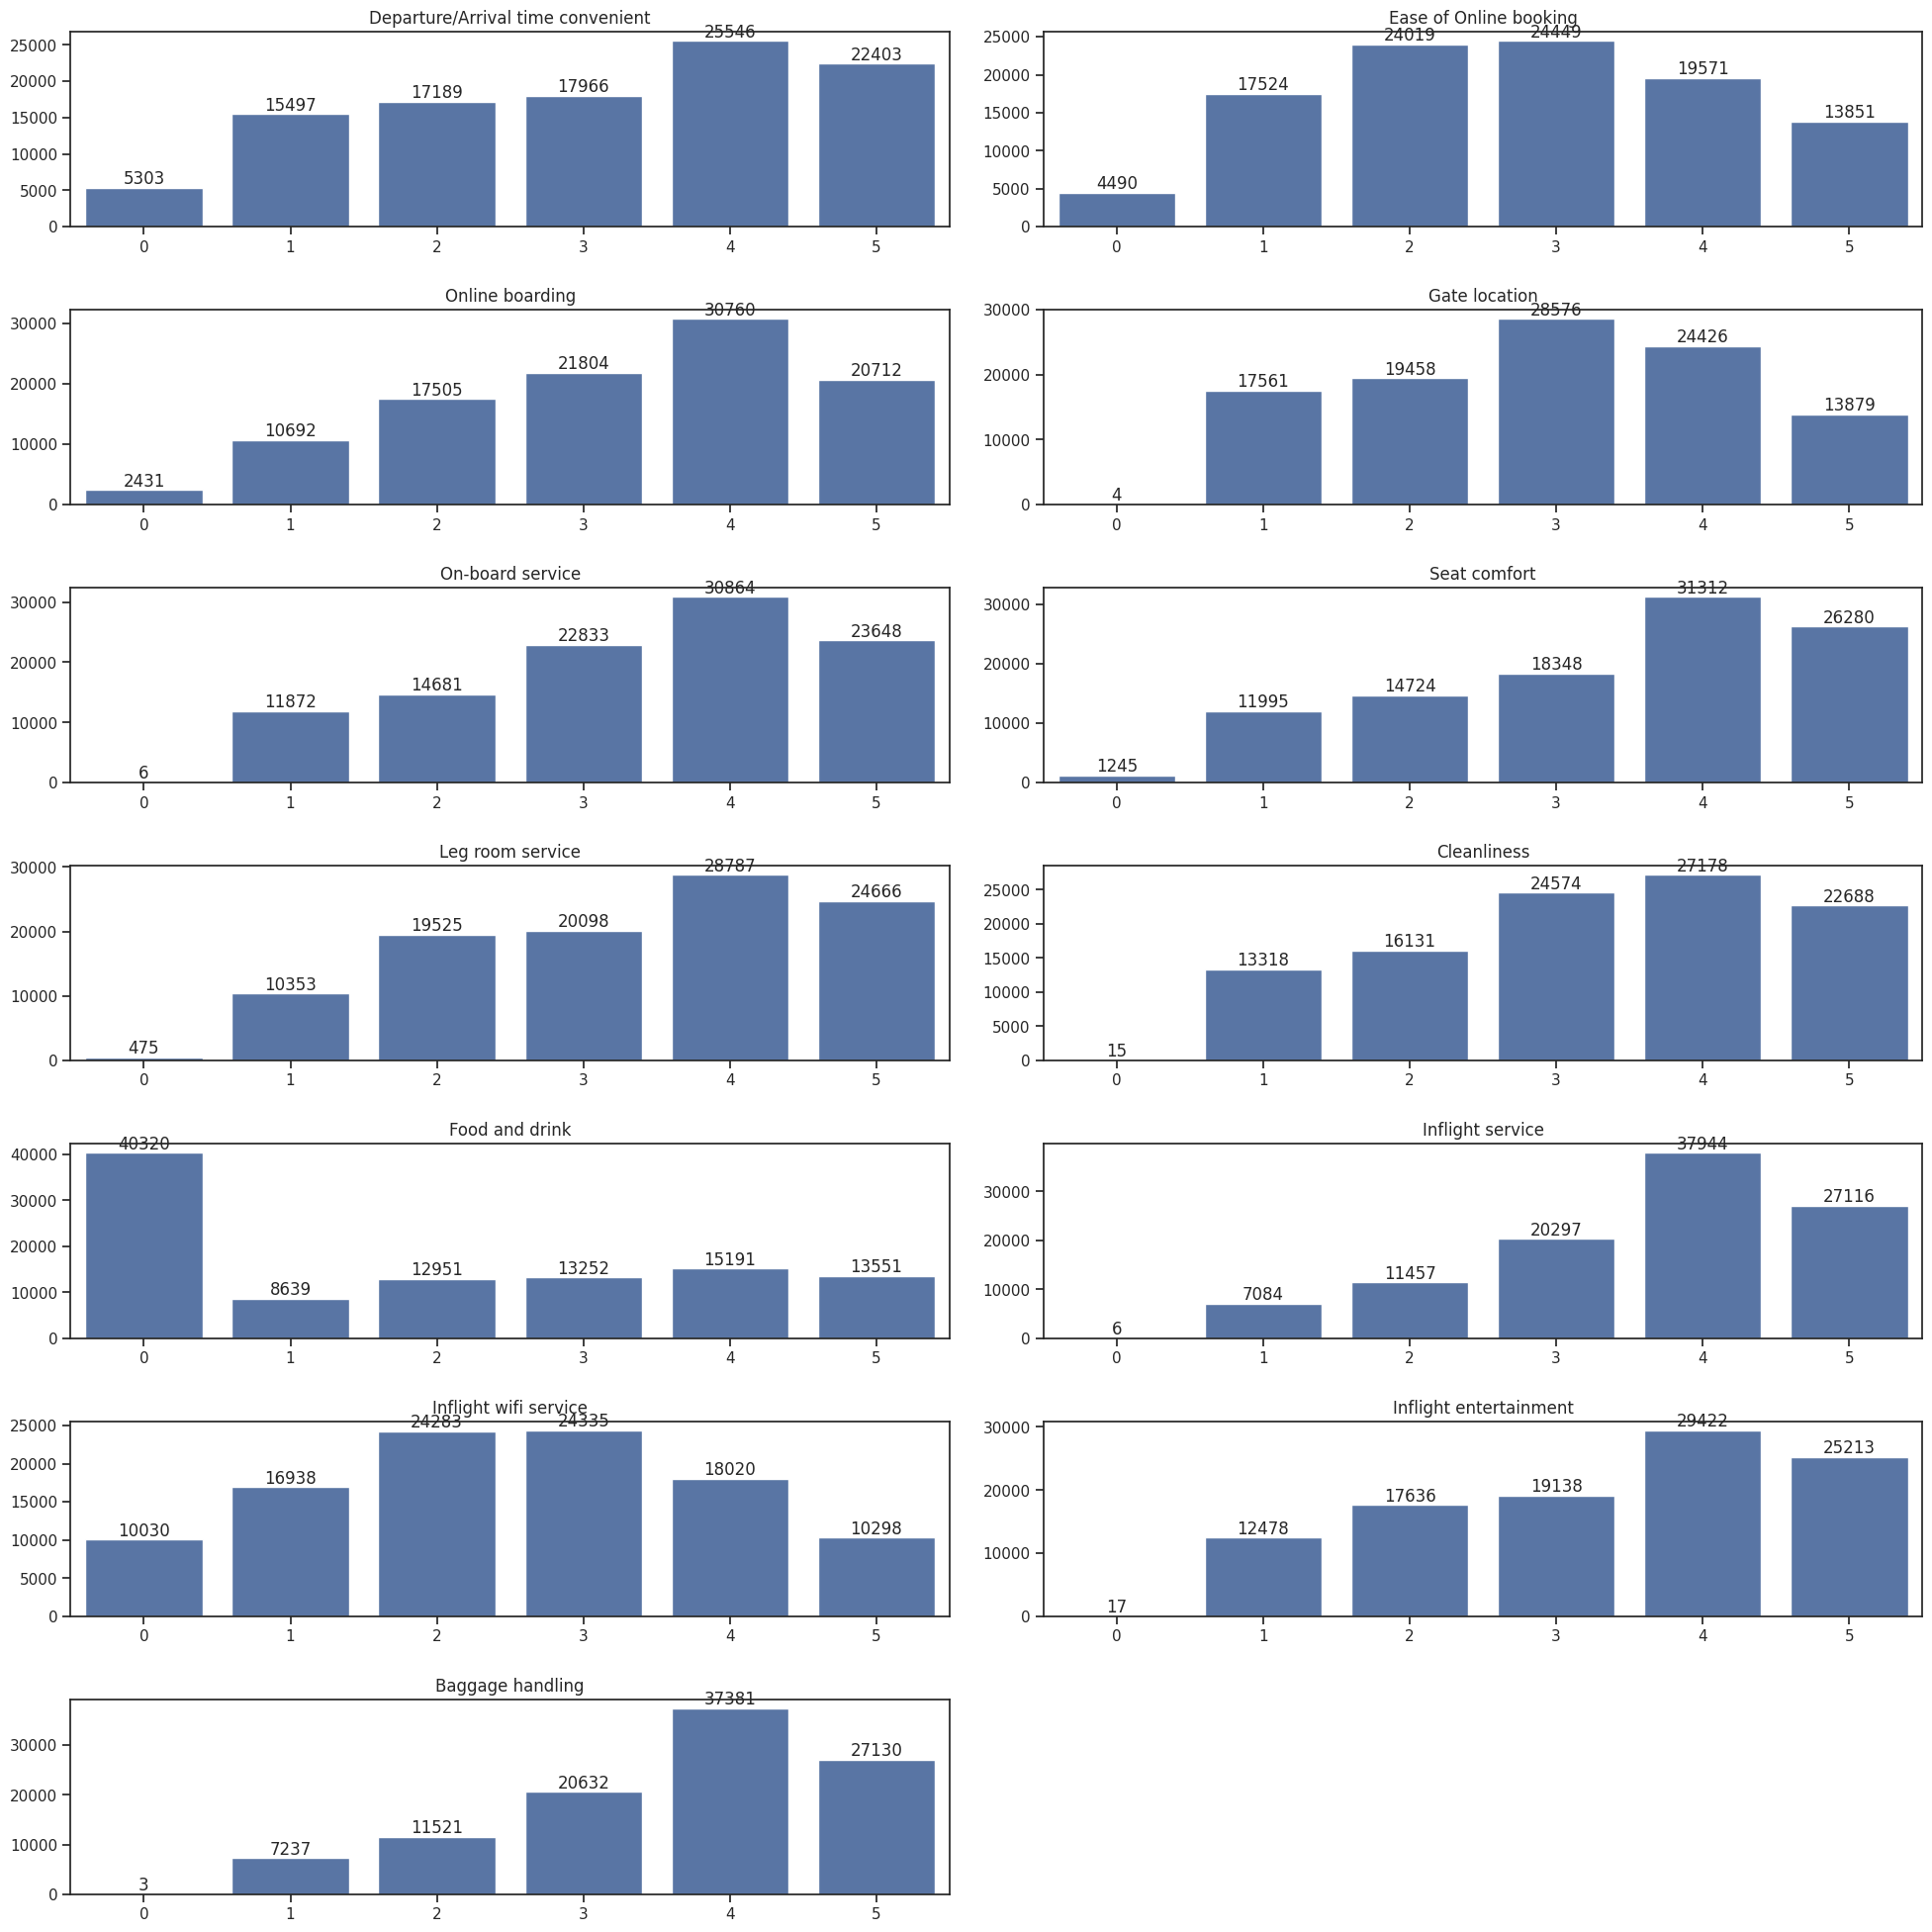

In [ ]:
services_columns = ['Departure/Arrival time convenient',
 'Ease of Online booking',
 'Online boarding',
 'Gate location',
 'On-board service',
 'Seat comfort',
 'Leg room service',
 'Cleanliness',
 'Food and drink',
 'Inflight service',
 'Inflight wifi service',
 'Inflight entertainment',
 'Baggage handling']
plt.figure(figsize=(20, 20))

# 2- loop over services list to plot columns
for index, col in enumerate(services_columns):
    plt.subplot((len(services_columns) + 1) // 2, 2, index + 1) # create sub-plot

    graph = sns.countplot(x = col, data = airlineDf)
    for container in graph.containers:
        graph.bar_label(container)

    plt.title(col, ) # set title to each plot
    graph.set_xlabel("") # replace x label with empty string
    graph.set_ylabel("") # replace y label with empty string

# 3- set layout between two plots
plt.tight_layout(pad = 2)

plt.show()

In [ ]:
object_columns = airlineDf.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    label_encoders[col] = LabelEncoder()
    airlineDf[col] = label_encoders[col].fit_transform(airlineDf[col])

# Display the modified DataFrame
airlineDf.head()

,Gender,Satisfied,Age,Type of Travel,Class,Flight Distance,Flight Distance Rounded,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,13,1,2,460,4760,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,1,0,25,0,0,235,235,0,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,1,26,0,0,1142,4760,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,1,25,0,0,562,560,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,4760,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


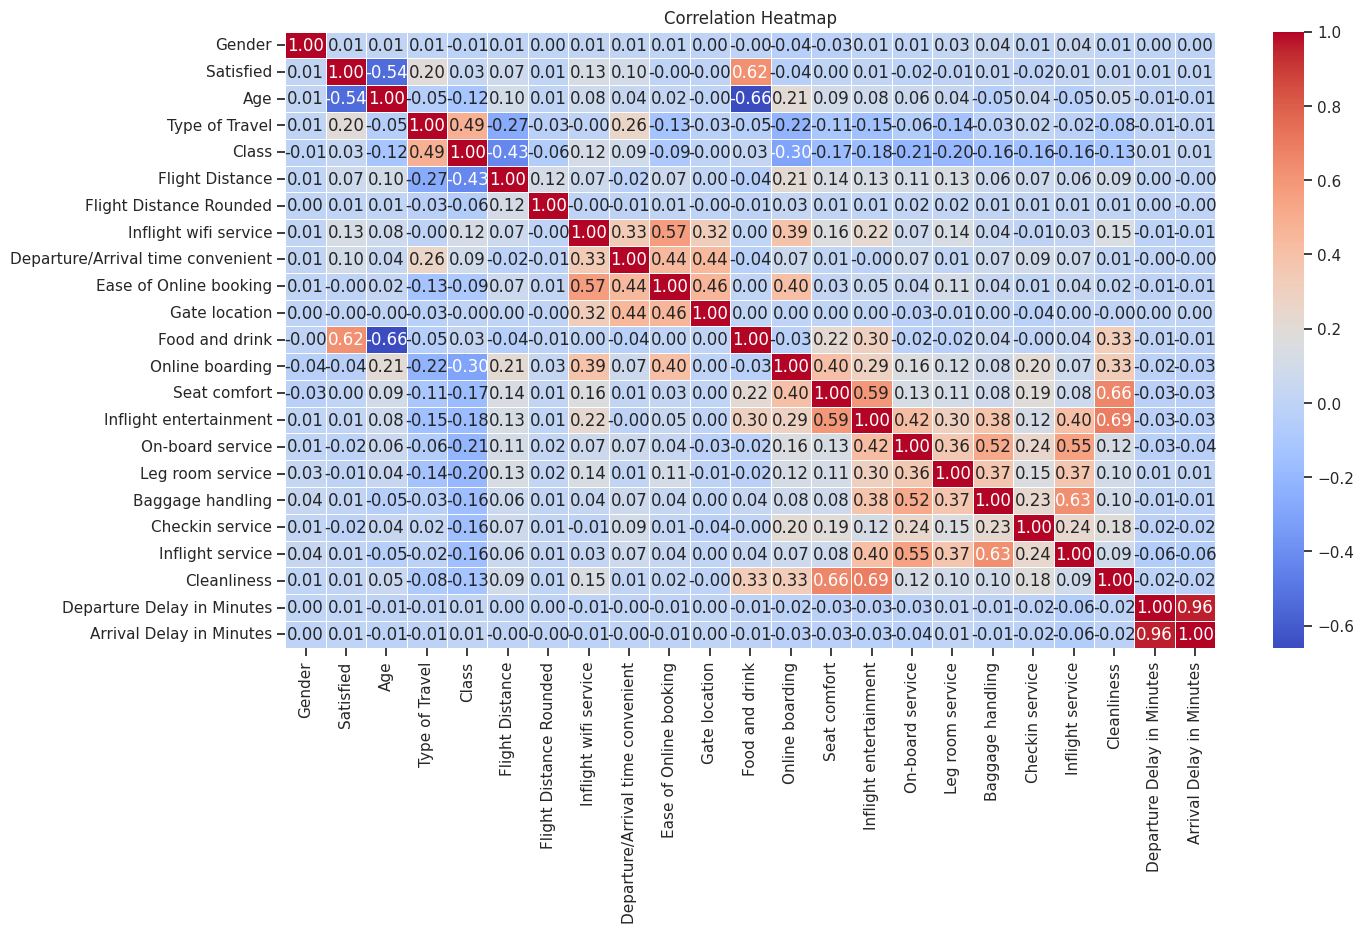

In [ ]:
correlation_matrix = airlineDf.corr()

# Plot heatmap
plt.figure(figsize=(15, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')  # Add a title to the plot
plt.show()

## Data preprocessing

In [ ]:
X = airlineDf.drop(columns= 'Satisfied')
y = airlineDf.Satisfied

### Standard Scalar

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Splitting the dataset into train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape:{X_train.shape}, y_train shape:{y_train.shape}")
print(f"X_test shape:{X_test.shape},y_test shape:{y_test.shape}")

X_train shape:(83123, 22), y_train shape:(83123,)
X_test shape:(20781, 22),y_test shape:(20781,)


## Development of model: Random forest

### Seraching for best parameters for the Model

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Ensure Random Forest uses all cores
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Get the results of all parameter combinations
results = grid_search.cv_results_

# Print accuracy of each configuration
print("\nAccuracy of each configuration:")
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Accuracy: {mean_score} with params: {params}")


Accuracy of each configuration:
Accuracy: 0.9923607285779414 with params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9927697576472461 with params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9929622468104814 with params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9924930651942658 with params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.9926374253728643 with params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.992938181594506 with params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.9925652441980792 with params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.9929381823181631 with params: {'max_depth': None

In [ ]:
# Retrieve the best parameters and print them
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Training the Random Forest Model

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth= 30, min_samples_leaf= 1, min_samples_split=2, n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, n_jobs=-1,
                       random_state=42)

### Model evaluation

In [ ]:
y_pred = rf_model.predict(X_test)

accuracyrf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracyrf:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11574
           1       0.99      1.00      0.99      9207

    accuracy                           0.99     20781
   macro avg       0.99      0.99      0.99     20781
weighted avg       0.99      0.99      0.99     20781

Confusion Matrix:
[[11500    74]
 [   43  9164]]


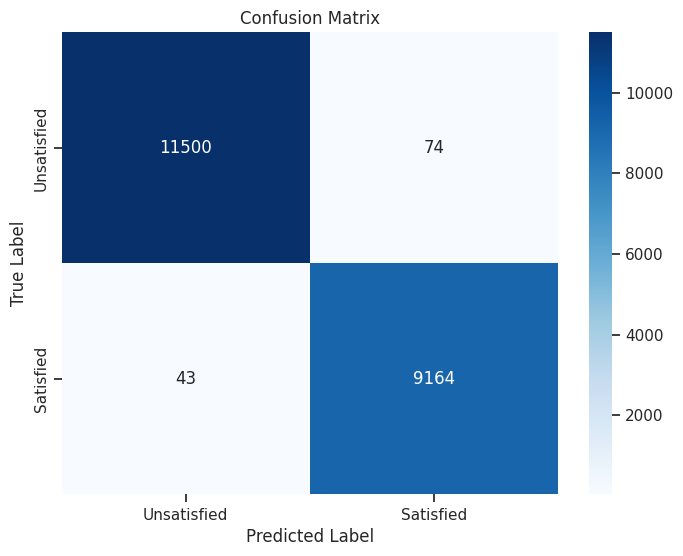

In [ ]:
# Plot the confusion matrix
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Labels for the binary classification
labels = ['Unsatisfied', 'Satisfied']
plot_confusion_matrix(confusion_matrix(y_test, y_pred), labels)

## Feature importance


<ipython-input-51-29fb21cd06a0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


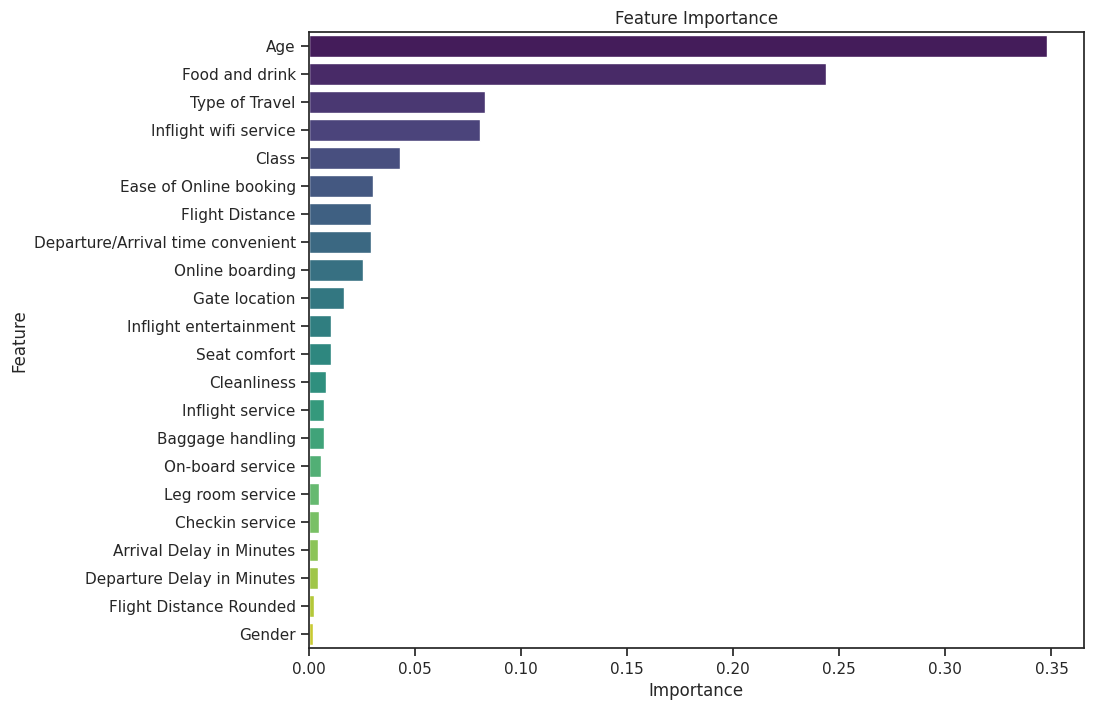

In [ ]:
X = airlineDf.drop(columns= 'Satisfied')
y = airlineDf.Satisfied
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to plot
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Development of  Model : Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

# Train the logistic regression model with the best parameters
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8713954416840947


In [ ]:
accuracy_log = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_log:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     11574
           1       0.86      0.85      0.85      9207

    accuracy                           0.87     20781
   macro avg       0.87      0.87      0.87     20781
weighted avg       0.87      0.87      0.87     20781

Confusion Matrix:
[[10311  1263]
 [ 1403  7804]]


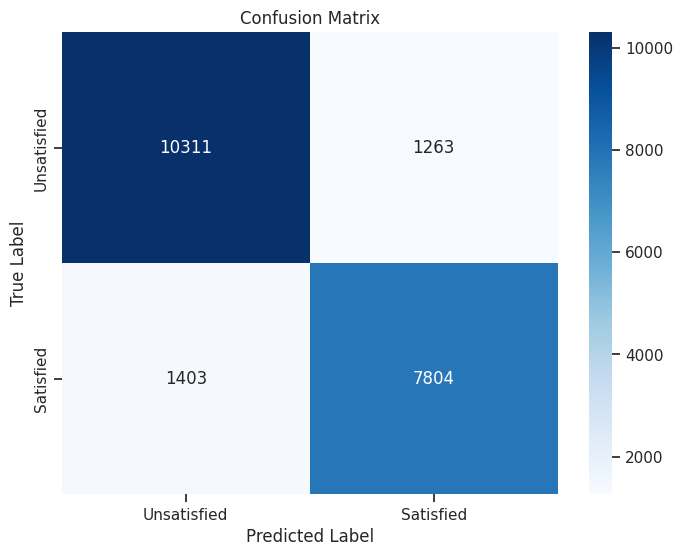

In [ ]:
# Call the plot function
plot_confusion_matrix(confusion_matrix(y_test, y_pred), labels)